In [1]:
import pandas as pd

In [5]:
df_13 = pd.read_excel("../특강/data/20210913.xlsx", engine = "openpyxl", index_col= 0)

df_14 = pd.read_excel("../특강/data/20210914.xlsx", engine = "openpyxl", index_col=0 )

In [6]:
df_13.head(5)

,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
종목코드,,,,,,,,,,,
095570,AJ네트웍스,5830,-130,-2.18,5980,5980,5800,133188,780734220,272973979850,46822295
006840,AK홀딩스,27150,0,0.00,27000,27200,26250,21725,581595350,359671281150,13247561
027410,BGF,6250,-70,-1.11,6270,6350,6230,105306,661320960,598229943750,95716791
282330,BGF리테일,179000,-2000,-1.10,183000,183500,177500,23213,4178520500,3093819174000,17283906
138930,BNK금융지주,7970,50,0.63,7920,7970,7890,839034,6661342020,2597703910620,325935246


In [9]:
# 시가가 0인 데이터
df_13 = df_13[df_13["시가"] !=0]

In [10]:
df_14 = df_14[~(df_14["시가"] ==0)]

In [12]:
# 추가 상장된 기업의 여부
idx = df_14.index.difference(df_13.index)

In [15]:
df_14.loc[idx,"종목명"]

종목코드
395400    SK리츠
Name: 종목명, dtype: object

In [18]:
전일비교시가총액 = df_13["시가총액"].sum()
전일기준시가총액 = df_13["시가총액"].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], "시가총액"])  / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14["시가총액"].sum() 
print(당일비교시가총액 / 당일기준시가총액 )

1.0067170373639553


In [17]:
증감률

1.0003960402269412

In [19]:
#  삼성전자와 코스피와의 관계

In [20]:
df = df_14[["종목명", "종가", "시가총액"]]
df.head(3)

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660


In [21]:
df["비중"] = df["시가총액"] / df["시가총액"].sum() * 100
df.sort_values("비중", ascending= False)

C:\Users\이주노\AppData\Local\Temp\ipykernel_14904\3641788870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["비중"] = df["시가총액"] / df["시가총액"].sum() * 100


,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.069204
000660,SK하이닉스,107500,78260254237500,3.434663
035420,NAVER,402500,66116016487500,2.901680
207940,삼성바이오로직스,913000,60408645000000,2.651197
005935,삼성전자우,71400,58754110380000,2.578583
...,...,...,...,...
001527,동양2우B,16550,5106816950,0.000224
002787,진흥기업2우B,16050,4731668400,0.000208
000547,흥국화재2우B,29500,4531200000,0.000199


In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
kospi = pd.read_excel("../특강/data/kospi.xlsx", engine= "openpyxl")
samsung = pd.read_excel("../특강/data/samsung.xlsx",engine="openpyxl")

c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [36]:
kospi.head(5)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2021/08/31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221,15863630,2309062613
1,2021/08/30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858,11758710,2269580866
2,2021/08/27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669,11039934,2262422712
3,2021/08/26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719,13335288,2259280094
4,2021/08/25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688,13365596,2272311235


In [37]:
samsung.head(5)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/08/31,76700,2100,2.82,74900,76700,74300,24630370,1864084402507,457882321585000,5969782550
1,2021/08/30,74600,300,0.40,75400,75500,74200,12686999,945673383900,445345778230000,5969782550
2,2021/08/27,74300,-300,-0.40,74300,75000,73800,15172748,1128028045800,443554843465000,5969782550
3,2021/08/26,74600,-1100,-1.45,76100,76200,74600,16671494,1254628461500,445345778230000,5969782550
4,2021/08/25,75700,100,0.13,76200,76600,74900,22319664,1688297846500,451912539035000,5969782550


In [39]:
data = [kospi["종가"], samsung["종가"]]
data

[0      3199.27
 1      3144.19
 2      3133.90
 3      3128.53
 4      3146.81
         ...   
 409    2151.31
 410    2175.54
 411    2155.07
 412    2176.46
 413    2175.17
 Name: 종가, Length: 414, dtype: float64,
 0      76700
 1      74600
 2      74300
 3      74600
 4      75700
        ...  
 409    56800
 410    55800
 411    55500
 412    55500
 413    55200
 Name: 종가, Length: 414, dtype: int64]

In [44]:
df = pd.concat(data,axis=1, keys = ["kospi", "samsung"])

<AxesSubplot: >

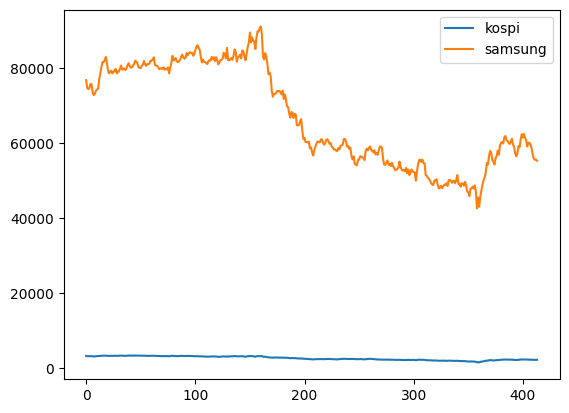

In [45]:
df.plot()

<AxesSubplot: xlabel='samsung', ylabel='kospi'>

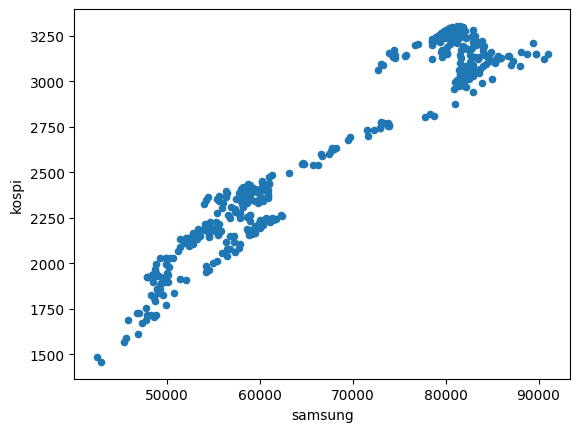

In [42]:
df.plot.scatter(x= "samsung", y="kospi")

In [43]:
df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


In [47]:
kospi

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2021/08/31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221,15863630,2309062613
1,2021/08/30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858,11758710,2269580866
2,2021/08/27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669,11039934,2262422712
3,2021/08/26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719,13335288,2259280094
4,2021/08/25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688,13365596,2272311235
...,...,...,...,...,...,...,...,...,...,...
409,2020/01/08,2151.31,-24.23,-1.11,2156.27,2162.32,2137.72,913831,8750722,1446631314
410,2020/01/07,2175.54,20.47,0.95,2166.60,2181.62,2164.27,568236,5143512,1462298814
411,2020/01/06,2155.07,-21.39,-0.98,2154.97,2164.42,2149.95,592671,5156541,1448385085
412,2020/01/03,2176.46,1.29,0.06,2192.58,2203.38,2165.39,631563,5763663,1462298972


In [48]:
kospi = pd.read_excel("../특강/data/kospi.xlsx", usecols=[0,1,4,5,6,7], parse_dates=[0])
kospi.head(6)


c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,일자,종가,시가,고가,저가,거래량
0,2021-08-31,3199.27,3144.49,3199.89,3130.30,661221
1,2021-08-30,3144.19,3160.87,3164.87,3132.77,602858
2,2021-08-27,3133.90,3116.29,3143.01,3106.97,520669
3,2021-08-26,3128.53,3151.30,3159.37,3121.04,727719
4,2021-08-25,3146.81,3148.13,3161.00,3124.25,624688
5,2021-08-24,3138.30,3119.70,3142.58,3115.23,586535


In [51]:
# groupby에서 사용하는 함수
#  min max sum mean count first last

how = {

    "시가" : "first",
    "고가" : "max",
    "저가" : "min",
    "종가" : "last",
    "거래량" : "sum"
}


kospi.groupby(pd.Grouper(key="일자", freq="m")).agg(how)

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-31,2201.21,2277.23,2119.01,2119.01,13096068
2020-02-29,2086.61,2255.49,1980.82,1987.01,13959766
2020-03-31,1997.03,2089.08,1439.43,1754.64,17091025
2020-04-30,1737.28,1957.51,1664.13,1947.56,21045123
2020-05-31,1906.42,2054.52,1894.29,2029.60,16206497
2020-06-30,2037.04,2217.21,2030.82,2108.33,19863703
2020-07-31,2128.81,2281.41,2101.33,2249.37,18866785
2020-08-31,2251.65,2458.17,2237.04,2326.17,17643125
2020-09-30,2340.19,2450.53,2267.63,2327.89,19606894


In [52]:
kospi.groupby(pd.Grouper(key="일자", freq="q")).agg(how)

,시가,고가,저가,종가,거래량
일자,,,,,
2020-03-31,2201.21,2277.23,1439.43,1754.64,44146859
2020-06-30,1737.28,2217.21,1664.13,2108.33,57115323
2020-09-30,2128.81,2458.17,2101.33,2327.89,56116804
2020-12-31,2330.55,2878.21,2266.93,2873.47,64644589
2021-03-31,2874.50,3266.23,2869.11,3061.42,84025557
2021-06-30,3073.77,3316.08,3069.68,3296.68,85211366
2021-09-30,3297.92,3313.51,3049.03,3199.27,35917984


In [53]:
kospi.groupby(pd.Grouper(key="일자", freq="10d")).agg(how)

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-02,2201.21,2206.92,2137.72,2206.39,4388120
2020-01-12,2204.49,2277.23,2204.49,2239.69,4775303
2020-01-22,2238.53,2269.27,2119.01,2119.01,3932645
2020-02-01,2086.61,2229.99,2082.74,2201.07,4140862
2020-02-11,2213.50,2255.49,2186.72,2195.50,4623956
...,...,...,...,...,...
2021-07-15,3269.33,3286.58,3214.42,3254.42,6822525
2021-07-25,3265.99,3265.99,3194.00,3237.14,5283809
2021-08-04,3246.65,3296.17,3146.76,3171.29,5650391


In [54]:
# krx 라이브러리 설치
!pip install pykrx


In [59]:
from pykrx import stock

In [57]:
import pykrx as pk


In [64]:
ticker = stock.get_market_ticker_list("20190225")
ticker

['095570',
 '068400',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '037560',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '004840',
 '155660',
 '069730',
 '017940',
 '007700',
 '114090',
 '078930',
 '006360',
 '001250',
 '007070',
 '078935',
 '012630',
 '039570',
 '089470',
 '294870',
 '082740',
 '003560',
 '175330',
 '234080',
 '001060',
 '001067',
 '001065',
 '096760',
 '105560',
 '002380',
 '009070',
 '009440',
 '119650',
 '092220',
 '001390',
 '001940',
 '025000',
 '092230',
 '000040',
 '044450',
 '030200',
 '033780',
 '030210',
 '058850',
 '093050',
 '003550',
 '034220',
 '001120',
 '051900',
 '051905',
 '003555',
 '032640',
 '011070',
 '066570',
 '066575',
 '108670',
 '108675',
 '051910',
 '051915',
 '079550',
 '006260',
 '000680',
 '010120',
 '229640',
 '023150',
 '035420',
 '181710',
 '005940',
 '005945',
 '034310',
 '008260',
 '004250',

In [65]:
stock.get_market_ticker_list(market="KOSDAQ")

['060310',
 '054620',
 '265520',
 '211270',
 '013720',
 '035760',
 '311690',
 '051500',
 '058820',
 '023460',
 '056730',
 '065770',
 '083660',
 '404950',
 '367340',
 '367360',
 '068790',
 '241520',
 '245620',
 '037370',
 '050120',
 '084180',
 '214270',
 '130500',
 '900290',
 '083450',
 '297890',
 '078150',
 '195940',
 '028300',
 '067630',
 '047920',
 '115450',
 '403870',
 '036640',
 '351340',
 '388790',
 '405350',
 '424760',
 '426550',
 '439730',
 '442770',
 '095340',
 '099520',
 '950170',
 '067290',
 '035900',
 '318000',
 '024840',
 '024120',
 '021320',
 '036670',
 '044180',
 '151860',
 '046440',
 '035600',
 '226360',
 '111870',
 '060720',
 '058400',
 '114450',
 '060370',
 '122450',
 '052900',
 '086960',
 '160550',
 '053290',
 '104200',
 '060250',
 '030190',
 '024940',
 '218410',
 '327260',
 '091340',
 '419530',
 '019550',
 '950110',
 '046140',
 '151910',
 '036120',
 '099220',
 '036540',
 '255220',
 '040610',
 '049470',
 '184230',
 '016250',
 '048550',
 '063440',
 '289080',
 '089230',

In [74]:
df = stock.get_market_ohlcv("20200101","20221220","005930","m")

df.head(10)


,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-31,55500,62800,54600,56400,319891636
2020-02-29,55500,62000,54200,54200,360007160
2020-03-31,54300,58000,42300,47750,856741868
2020-04-30,47450,52000,45350,50000,424101937
2020-05-31,48900,51200,47200,50700,374264673
2020-06-30,50800,57000,49900,52800,517439261
2020-07-31,53400,60400,52100,57900,437314531
2020-08-31,57800,59900,54000,54000,401697954
2020-09-30,54100,61300,54100,58200,426302298


In [75]:
df1 = stock.get_market_ohlcv("20200102")

df1.head(10)


,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
095570,4900,5140,4895,5050,210107,1056111000,1.61
068400,11800,11950,11700,11800,86321,1016863100,0.00
006840,34300,35450,33650,34850,29008,1004482200,0.72
027410,5570,5610,5500,5500,119121,659409550,-1.79
282330,169000,170000,167500,168500,21308,3598915000,-0.59
138930,7630,7650,7440,7470,530494,3991187460,-2.48
001460,237500,237500,235000,236500,220,51849000,0.00
001465,124500,124500,123000,124000,45,5558000,0.00
001040,96600,96800,93700,93800,67838,6409400000,-2.90


In [76]:
import time

In [77]:
tickers = stock.get_market_ticker_list() 

In [78]:
tickers[:4]

['095570', '006840', '027410', '282330']

In [80]:
for i in tickers[:4]:
   df = stock.get_market_ohlcv("20200101", "20210101", i)
   df.to_csv(f"{i}.csv") 
   time.sleep(1)

In [81]:
# CAGR 
# 1.연복리수익률 
# 2.(최종자산/최초자산) ^ (1/투자기간) -1  

In [83]:
kospi = pd.read_excel("../특강/data/kospi.xlsx", usecols=[0,1], index_col=0, parse_dates=True)
kospi.head(5)

c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가
일자,
2021-08-31,3199.27
2021-08-30,3144.19
2021-08-27,3133.90
2021-08-26,3128.53
2021-08-25,3146.81


In [85]:
kospi.sort_index(inplace=True)
kospi.head(5)

,종가
일자,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31


In [86]:
# 수익률  = kospi.iloc[-1,0] / kospi.iloc[0.0]
kospi / kospi.shift(1)

,종가
일자,
2020-01-02,NaN
2020-01-03,1.000593
2020-01-06,0.990172
2020-01-07,1.009499
2020-01-08,0.988863
...,...
2021-08-25,1.002712
2021-08-26,0.994191
2021-08-27,1.001716


In [92]:
수익률 = kospi.iloc[-1,0] / kospi.iloc[0,0] 

In [93]:
diff = kospi.index[-1] - kospi.index[0]
diff

투자기간 = diff.days / 365

In [94]:
CARG = 수익률 ** (1/투자기간) -1 

In [97]:
수익률 ** (1/투자기간) -1
print(CARG * 100)

26.111719470122587
